## Separation of data

In [1]:
# to delete any directory. Don't use it now.
# import shutil
# shutil.rmtree("../dog-cat-small")

In [2]:
import os, shutil
import os.path
from os import path
# our dataset (only train portion)
original_dataset_dir = "../input/dogs-vs-cats/train/train"    # we are asked to work with train part only.
# Create a Directory where we’ll store our smaller dataset
base_dir = "/kaggle/working/dog-cat-small"
if not path.exists(base_dir):
    os.mkdir("/kaggle/working/dog-cat-small")


In [3]:
# Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
if not path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not path.exists(test_dir):
    os.mkdir(test_dir)

In [4]:
#Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

In [5]:
# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

In [6]:
# now same work for validation and test sets
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [7]:
len(os.listdir(original_dataset_dir))

25000

So, we have 12500 dogs and 12500 cats images. Now let's split them.

In [8]:
# Copies the first 70% cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(0, int(12500*0.70), 1)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
# Copies the next 20% cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(int(12500*0.70), int(12500*0.90))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# Copies the rest 10% cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(int(12500*0.90), 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
# now same work for dog pictures

fnames = ['dog.{}.jpg'.format(i) for i in range(int(12500*0.70))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(int(12500*0.70), int(12500*0.90))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(int(12500*0.90), 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# sanity check
import pandas as pd
d = {
        "Set": ["Train","", "Validation","", "Test",""],
        "Type": ["Cats", "Dogs", "Cats", "Dogs", "Cats", "Dogs"],
        "Number": [len(os.listdir(train_cats_dir)),
                    len(os.listdir(train_dogs_dir)),
                    len(os.listdir(validation_cats_dir)),
                    len(os.listdir(validation_dogs_dir)),
                    len(os.listdir(test_cats_dir)),
                    len(os.listdir(test_dogs_dir))]
    }

p = pd.DataFrame(d)
p

,Set,Type,Number
0,Train,Cats,8750
1,,Dogs,8750
2,Validation,Cats,2500
3,,Dogs,2500
4,Test,Cats,1250
5,,Dogs,1250


## Convnet

In [13]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

#### Configure the Model for Training

In [15]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

## Data Preprocessing
- Read the picture files.
- Decode the JPEG content to RGB grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as we know, neural networks prefer to deal with small input values).

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=50,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=50,
    class_mode='binary') #Because we use binary_crossentropy loss, we need binary labels.

Found 17500 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 150, 150, 3)
labels batch shape: (50,)


## Fit the model

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
# it took 1hour to train in my pc. But with GPU, only about 10minutes. Only the 1st epoch was lengthy.

Epoch 1/30
100/100 [==============================] - 20s 204ms/step - loss: 0.6821 - acc: 0.5572 - val_loss: 0.6795 - val_acc: 0.5396
Epoch 2/30
100/100 [==============================] - 21s 207ms/step - loss: 0.6423 - acc: 0.6334 - val_loss: 0.5928 - val_acc: 0.6984
Epoch 3/30
100/100 [==============================] - 20s 197ms/step - loss: 0.6075 - acc: 0.6706 - val_loss: 0.5901 - val_acc: 0.6824
Epoch 4/30
100/100 [==============================] - 20s 199ms/step - loss: 0.5745 - acc: 0.7012 - val_loss: 0.5472 - val_acc: 0.7164
Epoch 5/30
100/100 [==============================] - 21s 209ms/step - loss: 0.5614 - acc: 0.7036 - val_loss: 0.5352 - val_acc: 0.7308
Epoch 6/30
100/100 [==============================] - 20s 199ms/step - loss: 0.5382 - acc: 0.7260 - val_loss: 0.5189 - val_acc: 0.7428
Epoch 7/30
100/100 [==============================] - 20s 198ms/step - loss: 0.5282 - acc: 0.7390 - val_loss: 0.5264 - val_acc: 0.7368
Epoch 8/30
100/100 [==============================] - 2

In [19]:
#### Save the model for future use:
model.save('/kaggle/working/cats_and_dogs_small_1.h5')

## Evaluation

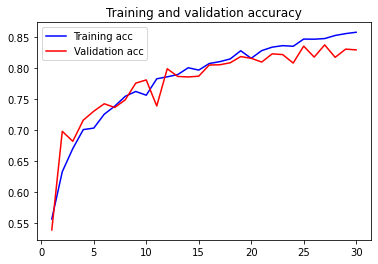

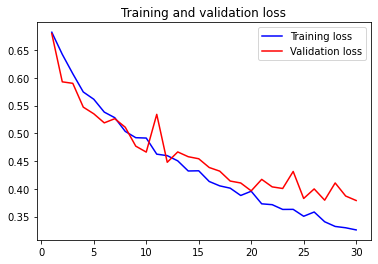

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary',
        shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Test Accuracy:', test_acc)

Found 2500 images belonging to 2 classes.
Test Accuracy: 0.8220000267028809


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
# load model
# from tensorflow.keras.models import load_model
# model = load_model('/kaggle/working/cats_and_dogs_small_1.h5')
# preds = model.predict_generator(test_generator, steps=len(test_generator))
# preds = model.predict(test_generator)
preds = model.predict_generator(test_generator,steps = len(test_generator.labels//50))

y=test_generator.classes # shape=(2500,)
y_test =y.reshape(2500,1)

acc = accuracy_score(test_generator.labels, np.round(preds))*100
cm = confusion_matrix(test_generator.labels, np.round(preds))

tn, fp, fn, tp = cm.ravel()

print('\n============TEST METRICS=============')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))


============TEST METRICS=============
Accuracy: 82.19999999999999%
Precision: 79.92565055762083%
Recall: 86.0%
F1-score: 82.85163776493258


### Confusion Matrix

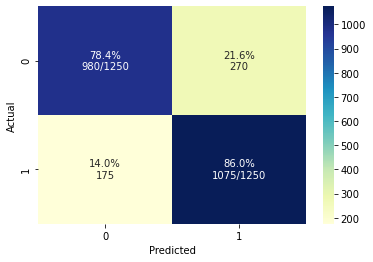

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots()
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(test_generator.labels, np.round(preds))

In [24]:
# %matplotlib inline
# import numpy as np
# import os
# import seaborn as sns
# import matplotlib.pyplot as plt

# ax = plt.axes()
# sns.heatmap(cm, annot=True, fmt="d")

# ax.set_title('Confusion Matrix')
# plt.show()